✅ 🎯 Project Overview
🎓 Goal
Build a decision tree classifier to predict Titanic survival, then improve it using hyperparameter tuning and GridSearchCV. You'll apply what you've learned across the entire week.
🧠 What You'll Practice
Data cleaning + feature engineering
Train/Test split
Training Decision Trees
Evaluating accuracy
Using GridSearchCV to find the best model
Drawing conclusions from results


In [1]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


🟩 Step 2: Preprocess the Data
Select useful features
Drop missing values for simplicity
Convert categorical data to numerical

In [2]:
df = titanic[["survived", "pclass", "sex", "age", "fare", "embarked"]].dropna()
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"C": 0, "Q": 1, "S": 2})
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,0,22.0,7.2500,2
1,1,1,1,38.0,71.2833,0
2,1,3,1,26.0,7.9250,2
3,1,1,1,35.0,53.1000,2
4,0,3,0,35.0,8.0500,2


🟩 Step 3: Train/Test Split

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🟩 Step 4: Train a Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6643356643356644


🟩 Step 5: Try Different Max Depths (Manually)

In [5]:
for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    preds = tree.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Depth: {depth}, Accuracy: {acc:.2f}")

Depth: 1, Accuracy: 0.75
Depth: 2, Accuracy: 0.75
Depth: 3, Accuracy: 0.75
Depth: 4, Accuracy: 0.71
Depth: 5, Accuracy: 0.74
Depth: 6, Accuracy: 0.71
Depth: 7, Accuracy: 0.68
Depth: 8, Accuracy: 0.74
Depth: 9, Accuracy: 0.72
Depth: 10, Accuracy: 0.69


🟩 Step 6: Use GridSearchCV to Tune Automatically

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": range(1, 11),
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': 7, 'min_samples_split': 5}
Best Score: 0.7978419500077628


🟩 Step 7: Evaluate the Best Model

In [7]:
best_model = grid.best_estimator_
test_preds = best_model.predict(X_test)

print("Test Accuracy (Best Model):", accuracy_score(y_test, test_preds))

Test Accuracy (Best Model): 0.6853146853146853


🟩 Step 8: (Optional) Visualize the Tree

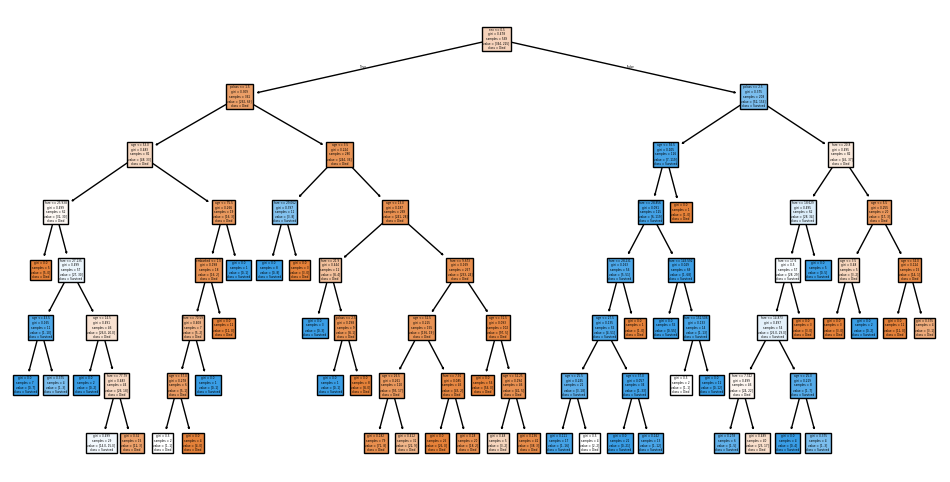

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(best_model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.show()

📝 Summary
At the end of this project, reflect on:
What hyperparameters improved performance?
How much better is the tuned model than the default?
What features seem most important?